<a href="https://colab.research.google.com/github/carlosmvond/Rocco_et_al_2025/blob/main/Rocco_et_al_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data processing and visualization**

This code processes batch culture data collected at 20, 25, and 30 °C (two replicates per condition). For each temperature, it computes the mean and standard deviation of biomass, protein, and substrate concentrations over time, and visualizes the results in a 3×3 grid of subplots. Error bars with capped ends represent experimental variability (±1 standard deviation), providing a clear overview of the datasets used for model fitting.

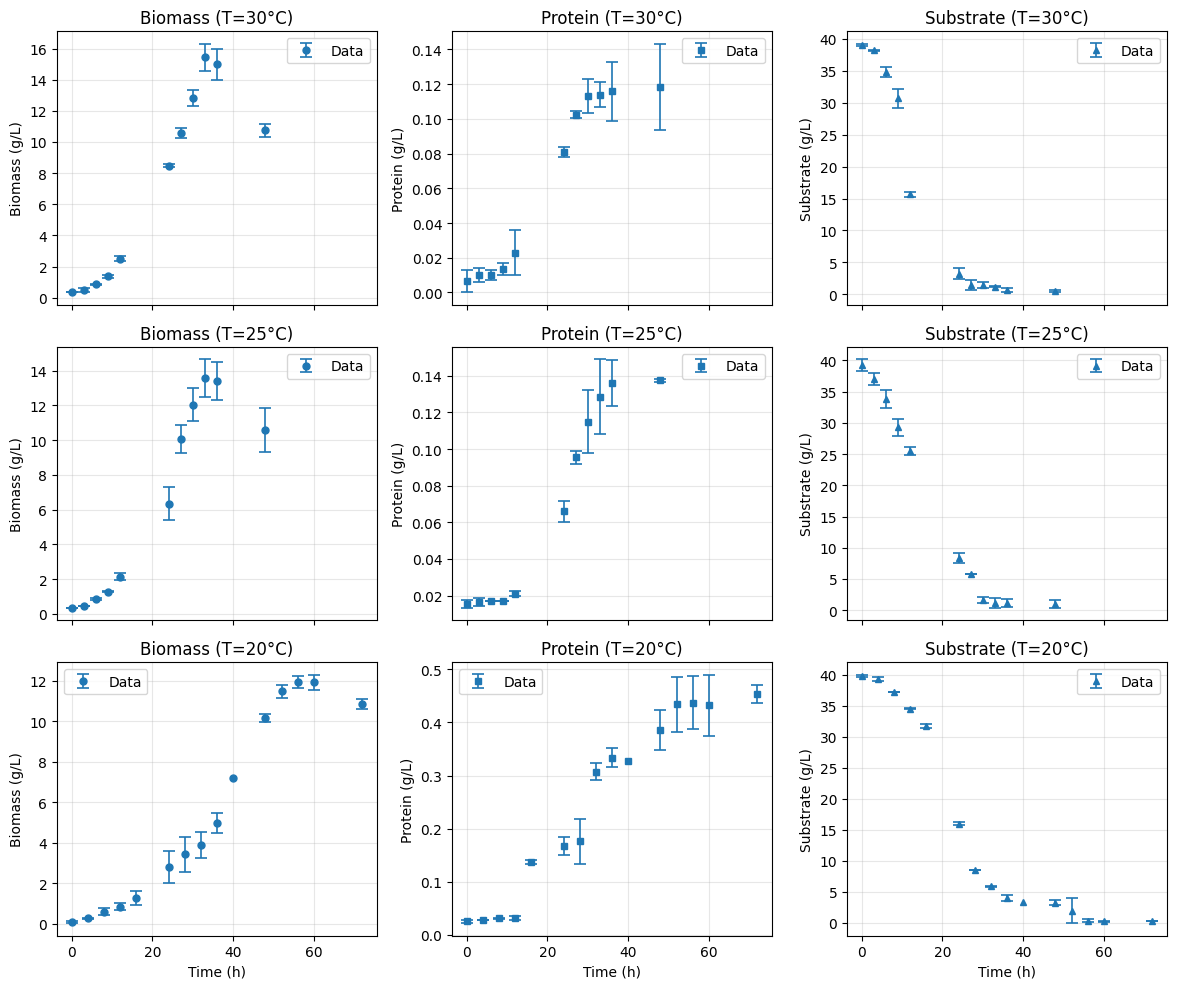

In [1]:
# =============================================================================
# Imports (unused libraries removed)
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =============================================================================
# 1) Data setup (same as your original data block)
# =============================================================================
data_rows_completo = [
    # T = 30, Replicate = 1
    [0, 0.36, 39.185, 0.002, 9.02, 30, 1],
    [3, 0.59, 38.268, 0.007, 2.25, 30, 1],
    [6, 0.85, 34.251, 0.008, 41.72, 30, 1],
    [9, 1.44, 29.667, 0.011, 22.55, 30, 1],
    [12, 2.60, 15.412, 0.014, 1346.19, 30, 1],
    [24, 8.54, 2.591, 0.079, 2095.95, 30, 1],
    [27, 10.82, 0.954, 0.101, 2259.43, 30, 1],
    [30, 12.46, 1.082, 0.120, 3133.21, 30, 1],
    [33, 14.81, 1.261, 0.119, 3296.69, 30, 1],
    [36, 14.29, 0.884, 0.128, 4204.30, 30, 1],
    [48, 10.47, 0.580, 0.136, 3245.96, 30, 1],
    # T = 30, Replicate = 2
    [0, 0.36, 38.967, 0.011, 36.08, 30, 2],
    [3, 0.39, 38.137, 0.013, 92.45, 30, 2],
    [6, 0.88, 35.408, 0.012, 23.68, 30, 2],
    [9, 1.28, 31.676, 0.016, 29.31, 30, 2],
    [12, 2.38, 15.893, 0.032, 1261.63, 30, 2],
    [24, 8.43, 3.802, 0.083, 2157.96, 30, 2],
    [27, 10.36, 2.001, 0.104, 2941.54, 30, 2],
    [30, 13.2, 1.770, 0.106, 3065.56, 30, 2],
    [33, 16.05, 1.112, 0.109, 3302.33, 30, 2],
    [36, 15.7, 0.429, 0.104, 3093.75, 30, 2],
    [48, 11.05, 0.407, 0.101, 3505.27, 30, 2],
    # T = 25, Replicate = 1
    [0, 0.35, 39.917, 0.014, 25.03, 25, 1],
    [3, 0.46, 37.684, 0.015, 25.37, 25, 1],
    [6, 0.8, 34.782, 0.017, 28.58, 25, 1],
    [9, 1.25, 30.272, 0.017, 25.88, 25, 1],
    [12, 1.99, 25.986, 0.022, 1347.03, 25, 1],
    [24, 5.67, 7.733, 0.070, 1170.30, 25, 1],
    [27, 9.47, 5.729, 0.093, 1604.94, 25, 1],
    [30, 11.35, 1.998, 0.103, 1714.87, 25, 1],
    [33, 12.79, 1.772, 0.114, 1782.51, 25, 1],
    [36, 12.62, 1.587, 0.127, 1478.10, 25, 1],
    [48, 9.71, 1.400, 0.137, 2154.57, 25, 1],
    # T = 25, Replicate = 2
    [0, 0.35, 38.577, 0.017, 22.83, 25, 2],
    [3, 0.47, 36.390, 0.018, 18.10, 25, 2],
    [6, 0.88, 32.773, 0.017, 40.08, 25, 2],
    [9, 1.30, 28.303, 0.017, 118.38, 25, 2],
    [12, 2.29, 25.008, 0.020, 1308.98, 25, 2],
    [24, 7.03, 8.899, 0.062, 1977.00, 25, 2],
    [27, 10.62, 5.788, 0.098, 2264.50, 25, 2],
    [30, 12.70, 1.290, 0.127, 2509.72, 25, 2],
    [33, 14.33, 0.650, 0.143, 2788.77, 25, 2],
    [36, 14.17, 0.637, 0.145, 3169.29, 25, 2],
    [48, 11.49, 0.551, 0.138, 2983.26, 25, 2],
    # T = 20, Replicate = 1
    [0, 0.13, 39.708, 0.028, 33.50, 20, 1],
    [4, 0.26, 39.468, 0.028, 39.40, 20, 1],
    [8, 0.47, 37.193, 0.030, 67.65, 20, 1],
    [12, 0.71, 34.568, 0.029, 98.09, 20, 1],
    [16, 1.03, 31.462, 0.140, 654.49, 20, 1],
    [24, 2.22, 16.086, 0.156, 728.90, 20, 1],
    [28, 2.83, 8.518, 0.206, 766.11, 20, 1],
    [32, 3.45, 5.937, 0.296, 1190.60, 20, 1],
    [36, 4.64, 4.380, 0.321, 1564.35, 20, 1],
    [48, 10.29, 3.499, 0.359, 2907.15, 20, 1],
    [52, 11.26, 3.392, 0.397, 2990.02, 20, 1],
    [56, 11.71, 0.504, 0.402, 3313.04, 20, 1],
    [60, 11.67, 0.136, 0.392, 3683.41, 20, 1],
    [72, 10.70, 0.302, 0.441, 3957.38, 20, 1],
    # T = 20, Replicate = 2
    [0, 0.04, 39.927, 0.023, 34.50, 20, 2],
    [4, 0.27, 39.030, 0.028, 28.92, 20, 2],
    [8, 0.72, 37.171, 0.032, 41.10, 20, 2],
    [12, 0.97, 34.481, 0.034, 169.12, 20, 2],
    [16, 1.52, 31.900, 0.135, 165.74, 20, 2],
    [24, 3.34, 15.736, 0.179, 485.37, 20, 2],
    [28, 4.05, 8.475, 0.146, 568.24, 20, 2],
    [32, 4.33, 5.719, 0.319, 596.99, 20, 2],
    [36, 5.34, 3.680, 0.347, 1207.51, 20, 2],
    [40, 7.18, 3.367, 0.327, 1564.35, 20, 2],
    [48, 10.03, 2.941, 0.413, 2771.86, 20, 2],
    [52, 11.72, 0.487, 0.471, 2888.55, 20, 2],
    [56, 12.13, 0.134, 0.473, 3402.67, 20, 2],
    [60, 12.19, 0.289, 0.473, 3453.41, 20, 2],
    [72, 11.03, 0.226, 0.466, 3642.82, 20, 2],
]

columns = [
    "time (h)",
    "biomass (g/L)",
    "glucose (g/L)",
    "protein (g/L)",
    "activity (IU/L)",
    "temperature (°C)",
    "replicate",
]
df = pd.DataFrame(data_rows_completo, columns=columns)

# =============================================================================
# 2) Mean/std by temperature
# =============================================================================
def get_mean_std_data(temp: int) -> pd.DataFrame:
    """Compute mean and standard deviation across replicates at each time point."""
    df_temp = df[df["temperature (°C)"] == temp]
    stats = (
        df_temp.groupby("time (h)")
        .agg(
            biomass_mean=("biomass (g/L)", "mean"),
            biomass_std=("biomass (g/L)", "std"),
            protein_mean=("protein (g/L)", "mean"),
            protein_std=("protein (g/L)", "std"),
            glucose_mean=("glucose (g/L)", "mean"),
            glucose_std=("glucose (g/L)", "std"),
        )
        .reset_index()
    )
    return stats

stats_30 = get_mean_std_data(30)
stats_25 = get_mean_std_data(25)
stats_20 = get_mean_std_data(20)

# Arrays (means + std) for later fitting / plotting
def unpack(stats: pd.DataFrame):
    """Extract numpy arrays from the summary table."""
    t = stats["time (h)"].to_numpy()
    x = stats["biomass_mean"].to_numpy()
    P = stats["protein_mean"].to_numpy()
    S = stats["glucose_mean"].to_numpy()
    ex = stats["biomass_std"].to_numpy()
    eP = stats["protein_std"].to_numpy()
    eS = stats["glucose_std"].to_numpy()
    return t, x, P, S, ex, eP, eS

data_time_30, data_x_30, data_P_30, data_S_30, error_x_30, error_P_30, error_S_30 = unpack(stats_30)
data_time_25, data_x_25, data_P_25, data_S_25, error_x_25, error_P_25, error_S_25 = unpack(stats_25)
data_time_20, data_x_20, data_P_20, data_S_20, error_x_20, error_P_20, error_S_20 = unpack(stats_20)

# =============================================================================
# 3) Plot data in the SAME layout as your fit plot (3x3)
#    Improve error bars: add caps at the ends + nicer thickness
# =============================================================================
temps = [
    ("30", data_time_30, data_x_30, data_P_30, data_S_30, error_x_30, error_P_30, error_S_30),
    ("25", data_time_25, data_x_25, data_P_25, data_S_25, error_x_25, error_P_25, error_S_25),
    ("20", data_time_20, data_x_20, data_P_20, data_S_20, error_x_20, error_P_20, error_S_20),
]
y_labels = ["Biomass (g/L)", "Protein (g/L)", "Substrate (g/L)"]

# Errorbar style (caps at the extremes)
eb_kws = dict(
    capsize=4,        # add caps at the ends of the error bars
    capthick=1.2,     # cap thickness
    elinewidth=1.2,   # error bar line thickness
    markersize=5,     # marker size
)

fig, axs = plt.subplots(3, 3, figsize=(12, 10), sharex=True)

for i, (lab, t_data, x_data, P_data, S_data, ex, eP, eS) in enumerate(temps):
    # Biomass
    ax = axs[i, 0]
    ax.errorbar(t_data, x_data, yerr=ex, fmt="o", label="Data", **eb_kws)
    ax.set_title(f"Biomass (T={lab}°C)")
    ax.set_ylabel(y_labels[0])
    ax.grid(alpha=0.3)
    ax.legend()

    # Protein
    ax = axs[i, 1]
    ax.errorbar(t_data, P_data, yerr=eP, fmt="s", label="Data", **eb_kws)
    ax.set_title(f"Protein (T={lab}°C)")
    ax.set_ylabel(y_labels[1])
    ax.grid(alpha=0.3)
    ax.legend()

    # Substrate (glucose)
    ax = axs[i, 2]
    ax.errorbar(t_data, S_data, yerr=eS, fmt="^", label="Data", **eb_kws)
    ax.set_title(f"Substrate (T={lab}°C)")
    ax.set_ylabel(y_labels[2])
    ax.grid(alpha=0.3)
    ax.legend()

for ax in axs[-1]:
    ax.set_xlabel("Time (h)")

plt.tight_layout()
plt.show()


## **Dynamic model formulation and parameter estimation**

This code estimates kinetic parameters of a dynamic bioprocess model by combining numerical integration of ordinary differential equations with nonlinear least-squares optimization using the *lmfit *library.

The model describes the time evolution of biomass $x(t)$, recombinant protein $P(t)$,
substrate $S(t)$, and an internal, dimensionless lag variable $z(t)$ accounting for the
observed delay between substrate uptake and growth or production. The state vector is
$y(t) = (x(t), P(t), S(t), z(t))$.

Substrate uptake is modeled using a Monod-type expression

$$\rho(S) = \rho_{\max} S / (S + K_s),$$

while growth and production are modulated by a Droop-type limitation

$$\ell(z) = 1 - z_{\min}/z,$$

leading to the specific rates
$\mu = \mu_{\max}\ell(z)$ and $q = q_{\max}\ell(z)$.

The resulting dynamic system is given by
$$
\begin{aligned}
\dot x &= (\mu - m)\,x, \\
\dot P &= q\,x - m_P\,P, \\
\dot S &= -\rho\,x, \\
\dot z &= \rho - \mu\,z.
\end{aligned}
$$

For each parameter set, model trajectories are generated using a Runge--Kutta time integrator. Parameter estimation is performed by minimizing normalized residuals between model predictions and experimental measurements of $x$, $P$, and $S$ with \textit{lmfit}. The fitting is carried out independently for datasets obtained at different cultivation temperatures, and $95\%$. Wald confidence intervals are reported for the estimated parameters.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.stats import t as student_t

import importlib
import subprocess
import sys

# =============================================================================
# Install / import lmfit
# =============================================================================
package_name = "lmfit"
try:
    importlib.import_module(package_name)
except ImportError:
    print(f"Package '{package_name}' not found. Installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
finally:
    lmfit = importlib.import_module(package_name)
    print(f"'{package_name}' version {lmfit.__version__} successfully loaded.")

# =============================================================================
# 2) Model definition
# =============================================================================
def combined_model(t, y, umax, m, qmax, m_P, rhomax, Ks, zmin):
    x, P, S, z = y

    # Substrate uptake
    rho = rhomax * S / (S + Ks)

    # Droop-type limitation
    limitation = 1.0 - (zmin / z)

    # Specific rates
    mu = umax * limitation
    q  = qmax * limitation

    dx_dt = mu * x - m * x
    dP_dt = q * x - m_P * P
    dS_dt = -rho * x
    dz_dt = rho - mu * z

    return [dx_dt, dP_dt, dS_dt, dz_dt]

def solve_combined(t_eval, params):
    y0 = [
        params["x0"],
        params["P0"],
        params["S0"],
        params["z0"],
    ]

    sol = solve_ivp(
        lambda t, y: combined_model(
            t, y,
            params["umax"], params["m"], params["qmax"],
            params["m_P"], params["rhomax"],
            params["Ks"], params["zmin"],
        ),
        (t_eval[0], t_eval[-1]),
        y0,
        t_eval=t_eval,
        method="RK45",
    )
    return sol.y  # [x, P, S, z]

# =============================================================================
# 3) Residual function for lmfit
# =============================================================================
def residual_lmfit(params, t_data, x_data, P_data, S_data):
    t_fine = np.linspace(t_data.min(), t_data.max(), 500)
    x_f, P_f, S_f, _ = solve_combined(t_fine, params)

    x_model = np.interp(t_data, t_fine, x_f)
    P_model = np.interp(t_data, t_fine, P_f)
    S_model = np.interp(t_data, t_fine, S_f)

    rx = (x_data - x_model) / np.mean(x_data)
    rP = (P_data - P_model) / np.mean(P_data)
    rS = (S_data - S_model) / np.mean(S_data)

    return np.concatenate([rx, rP, rS])

# =============================================================================
# 3b) Wald confidence intervals (scientific notation)
# =============================================================================
def print_confidence_intervals(result, alpha=0.05):
    """
    Print Wald-type confidence intervals in scientific notation:
        estimate ± t_(1-alpha/2, dof) * SE
    """
    if result.covar is None:
        print(
            "\n[CI] Confidence intervals could not be computed: "
            "result.covar is None."
        )
        return

    # Degrees of freedom
    dof = getattr(result, "nfree", None)
    if dof is None or dof <= 0:
        dof = max(1, result.ndata - result.nvarys)

    tcrit = student_t.ppf(1 - alpha / 2, dof)

    names = list(result.var_names)  # varying parameters only
    se = np.sqrt(np.diag(result.covar))

    rows = []
    for name, s in zip(names, se):
        est = result.params[name].value
        lo = est - tcrit * s
        hi = est + tcrit * s
        rows.append((name, est, s, lo, hi))

    df = pd.DataFrame(
        rows,
        columns=["parameter", "estimate", "SE", "CI_low", "CI_high"],
    )

    print(
        f"\n95% Wald confidence intervals "
        f"(dof = {dof}, t_crit = {tcrit:.3g}):"
    )

    # Scientific notation formatting
    print(
        df.to_string(
            index=False,
            formatters={
                "estimate": "{:.3e}".format,
                "SE": "{:.3e}".format,
                "CI_low": "{:.3e}".format,
                "CI_high": "{:.3e}".format,
            },
        )
    )

# =============================================================================
# 4) Fit for each temperature with lmfit
# =============================================================================
def fit_temperature(t_data, x_data, P_data, S_data, guess, bounds):
    params = lmfit.Parameters()

    # Kinetic parameters
    params.add("umax",   value=guess[0], min=bounds[0][0], max=bounds[1][0], vary=True)
    params.add("m",      value=guess[1], min=bounds[0][1], max=bounds[1][1], vary=True)
    params.add("qmax",   value=guess[2], min=bounds[0][2], max=bounds[1][2], vary=True)
    params.add("m_P",    value=guess[3], min=bounds[0][3], max=bounds[1][3], vary=True)
    params.add("rhomax", value=guess[4], min=bounds[0][4], max=bounds[1][4], vary=True)

    # Fixed parameters
    params.add("Ks",   value=1.0, vary=False)
    params.add("z0",   value=1.0, min=0.1, max=5.0,  vary=False)
    params.add("zmin", value=1.0, min=0.1, max=10.0, vary=False)

    # Initial conditions
    params.add("x0", value=x_data[0], min=0.0, vary=True)
    params.add("P0", value=P_data[0], min=0.0, vary=True)
    params.add("S0", value=S_data[0], min=0.0, vary=True)

    minimizer = lmfit.Minimizer(
        residual_lmfit,
        params,
        fcn_args=(t_data, x_data, P_data, S_data),
    )
    result = minimizer.minimize()

    print(lmfit.fit_report(result, show_correl=False))
    print_confidence_intervals(result, alpha=0.05)

    return result

# =============================================================================
# 5) Initial guesses and bounds
# =============================================================================
guess30 = [0.18, 0.01, 0.10, 0.01, 0.10]
guess25 = [0.17, 0.01, 0.10, 0.01, 0.10]
guess20 = [0.09, 0.01, 0.10, 0.01, 0.10]

bounds_l = [
    [0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 0.1, 5.0, 1.0, 5.0],
]

res30 = fit_temperature(data_time_30, data_x_30, data_P_30, data_S_30, guess30, bounds_l)
res25 = fit_temperature(data_time_25, data_x_25, data_P_25, data_S_25, guess25, bounds_l)
res20 = fit_temperature(data_time_20, data_x_20, data_P_20, data_S_20, guess20, bounds_l)


'lmfit' version 1.3.4 successfully loaded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 261
    # data points      = 33
    # variables        = 8
    chi-square         = 0.29771512
    reduced chi-square = 0.01190860
    Akaike info crit   = -139.368151
    Bayesian info crit = -127.396090
[[Variables]]
    umax:    0.20069450 +/- 0.01588363 (7.91%) (init = 0.18)
    m:       0.03494369 +/- 0.00172716 (4.94%) (init = 0.01)
    qmax:    0.00137178 +/- 1.4188e-04 (10.34%) (init = 0.1)
    m_P:     0.01724187 +/- 0.00606006 (35.15%) (init = 0.01)
    rhomax:  2.32970948 +/- 0.67056930 (28.78%) (init = 0.1)
    Ks:      1 (fixed)
    z0:      1 (fixed)
    zmin:    1 (fixed)
    x0:      0.37011172 +/- 0.15426171 (41.68%) (init = 0.36)
    P0:      0.00989717 +/- 0.00366532 (37.03%) (init = 0.0065)
    S0:      41.0110118 +/- 1.15354522 (2.81%) (init = 39.076)

95% Wald confidence intervals (dof = 25, t_crit = 2.06):
parameter  estimate        SE    CI_low

## **Model–data comparison and goodness-of-fit assessment**

This code generates a comprehensive visualization of the model fit to experimental data obtained at three cultivation temperatures (30, 25, and 20 $^\circ$C).

For each temperature, the model is simulated on a fine time grid using the estimated parameter set, and the resulting trajectories for biomass, protein, and substrate are interpolated at the experimental sampling times. The agreement between model predictions and experimental data is quantified using the coefficient of determination,

$$R^2 = 1 - \sum (y_{\text{data}} - y_{\text{model}})^2 / \sum (y_{\text{data}} - \bar y_{\text{data}})^2,$$

computed separately for each state variable.

The figure is organized as a $3 \times 3$ grid of subplots, where rows correspond to different temperatures and columns to biomass, protein, and substrate, respectively. Experimental measurements are shown as symbols with error bars, while dashed lines represent the corresponding model predictions. The $R^2$ value for each variable and temperature is reported directly in the subplot titles to facilitate a direct visual and quantitative assessment of the model performance.


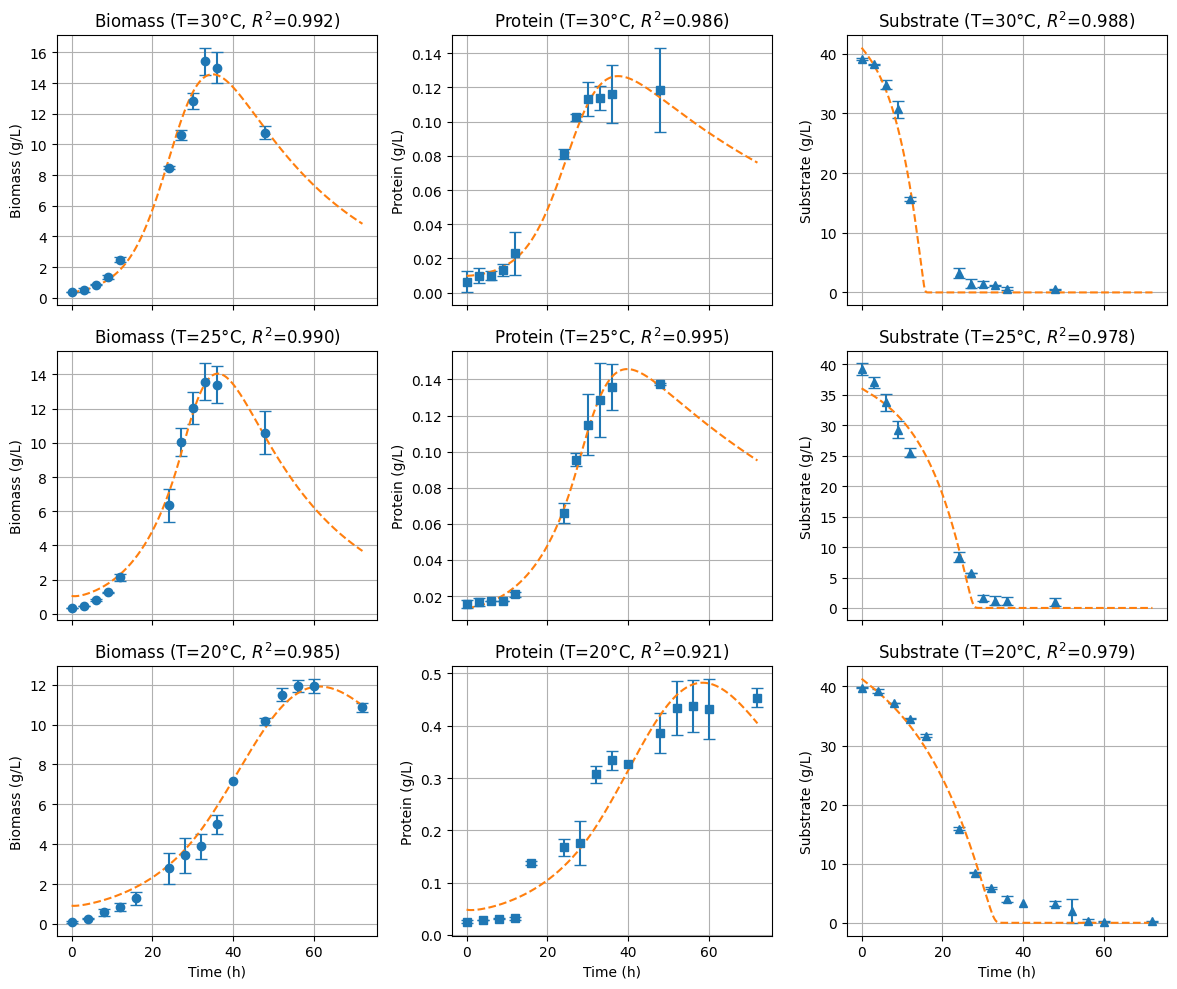

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# =============================================================================
# 5. Plot results for all three temperatures with R^2 in subplot titles
# =============================================================================

def r2_score(y_data, y_model):
    """Coefficient of determination R^2."""
    ss_res = np.sum((y_data - y_model)**2)
    ss_tot = np.sum((y_data - np.mean(y_data))**2)
    return 1.0 - ss_res / ss_tot


temps = [
    (data_time_30, data_x_30, data_P_30, data_S_30, res30, '30'),
    (data_time_25, data_x_25, data_P_25, data_S_25, res25, '25'),
    (data_time_20, data_x_20, data_P_20, data_S_20, res20, '20'),
]

y_labels = ['Biomass (g/L)', 'Protein (g/L)', 'Substrate (g/L)']

t_fine = np.linspace(
    0,
    max(data_time_30.max(), data_time_25.max(), data_time_20.max()),
    500
)

fig, axs = plt.subplots(3, 3, figsize=(12, 10), sharex=True)

for i, (t_data, x_data, P_data, S_data, res, lab) in enumerate(temps):

    # Model trajectories
    x_f, P_f, S_f, _ = solve_combined(t_fine, res.params)

    # Interpolate model at data times (for R^2 computation)
    x_model = np.interp(t_data, t_fine, x_f)
    P_model = np.interp(t_data, t_fine, P_f)
    S_model = np.interp(t_data, t_fine, S_f)

    # R^2 values
    R2_x = r2_score(x_data, x_model)
    R2_P = r2_score(P_data, P_model)
    R2_S = r2_score(S_data, S_model)

    # ---------------- Biomass ----------------
    ax = axs[i, 0]
    ax.errorbar(
        t_data, x_data,
        yerr=globals()[f'error_x_{lab}'],
        fmt='o', capsize=4
    )
    ax.plot(t_fine, x_f, '--')
    ax.set_title(f'Biomass (T={lab}°C, $R^2$={R2_x:.3f})')
    ax.set_ylabel(y_labels[0])
    ax.grid()

    # ---------------- Protein ----------------
    ax = axs[i, 1]
    ax.errorbar(
        t_data, P_data,
        yerr=globals()[f'error_P_{lab}'],
        fmt='s', capsize=4
    )
    ax.plot(t_fine, P_f, '--')
    ax.set_title(f'Protein (T={lab}°C, $R^2$={R2_P:.3f})')
    ax.set_ylabel(y_labels[1])
    ax.grid()

    # ---------------- Substrate ----------------
    ax = axs[i, 2]
    ax.errorbar(
        t_data, S_data,
        yerr=globals()[f'error_S_{lab}'],
        fmt='^', capsize=4
    )
    ax.plot(t_fine, S_f, '--')
    ax.set_title(f'Substrate (T={lab}°C, $R^2$={R2_S:.3f})')
    ax.set_ylabel(y_labels[2])
    ax.grid()

# Shared x-axis label
for ax in axs[-1]:
    ax.set_xlabel('Time (h)')

plt.tight_layout()

# -------- SAVE FIGURE (TIFF, high resolution) --------
fig.savefig(
    "model_fit_all_temperatures.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

from google.colab import files
files.download("model_fit_all_temperatures.png")


## **Chemostat simulations and productivity analysis**

This code uses the parameters previously estimated from batch experiments to simulate continuous chemostat operation over a wide range of dilution rates $D$ and cultivation temperatures (20, 25, and 30 $^\circ$C).

For each temperature, the fitted parameter set is extracted from the corresponding *lmfit* result and used to define a chemostat model with four state variables: biomass $x(t)$, recombinant protein $P(t)$, substrate $S(t)$, and the internal lag variable $z(t)$. The model accounts explicitly for dilution through outflow terms proportional to $D$ in the biomass, protein, and substrate balances, while the internal variable $z$ is governed by uptake and growth dynamics only.

For a given dilution rate, the chemostat model is integrated in time using a Runge-Kutta method until a steady state is reached. Steady-state biomass and protein concentrations are extracted from the final simulation time, and the corresponding productivities are computed as $D x$ and $D P$.

This procedure is repeated over a dense grid of dilution rates for each temperature, allowing the construction of steady-state curves for biomass concentration, protein concentration, biomass productivity, and protein productivity as functions of $D$.

The resulting plots provide a quantitative basis for comparing operating regimes and selecting dilution rates of interest for subsequent chemostat experiments.


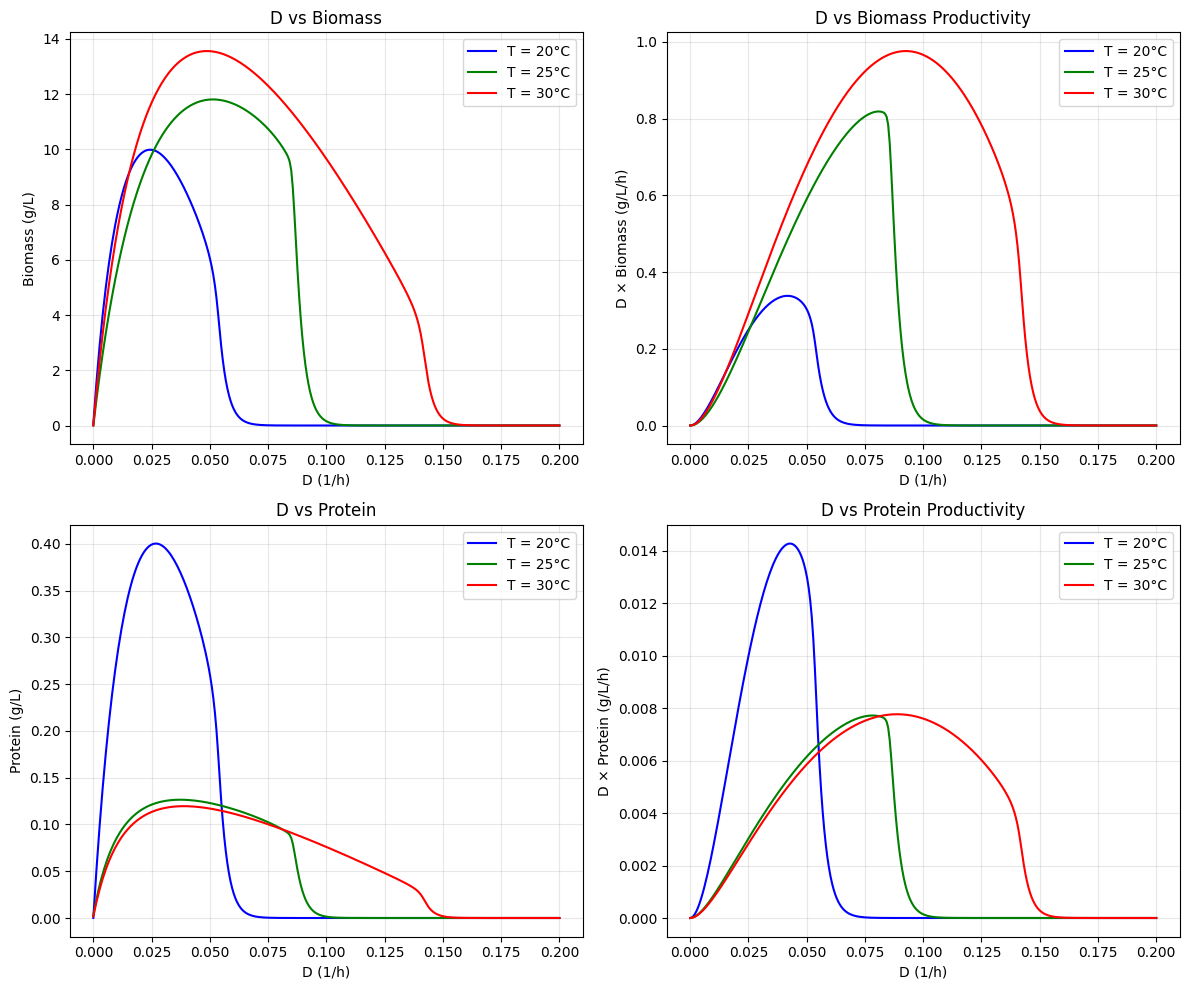

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Dilution rate range
D_values = np.linspace(0.0000, 0.2, 300)

# Temperatures (and fitted results) to simulate
fit_results = {20: res20, 25: res25, 30: res30}
temperatures = [20, 25, 30]

# Store simulation results
results = {T: {"D": [], "x": [], "Dx": [], "P": [], "DP": []} for T in temperatures}

def simulate_chemostat_from_fit(res, D, Sin=40.0, t_max=300.0):
    """
    Simulate the chemostat model using fitted parameters stored in an lmfit result.

    States: x (biomass), P (protein), S (substrate), z (quota)
    Kinetics:
        rho(S) = rhomax * S/(S + Ks)
        mu(z)  = umax * (1 - zmin/z)
        q(z)   = qmax * (1 - zmin/z)

    Chemostat balances:
        dx/dt = mu x - m x - D x
        dP/dt = q x  - m_P P - D P
        dS/dt = D(Sin - S) - rho x
        dz/dt = rho - mu z
    """
    p = res.params  # lmfit Parameters object

    # Extract fitted parameters / fixed parameters (all available in res.params)
    umax   = p["umax"].value
    m      = p["m"].value
    qmax   = p["qmax"].value
    m_P    = p["m_P"].value
    rhomax = p["rhomax"].value
    Ks     = p["Ks"].value
    zmin   = p["zmin"].value

    # Initial conditions (estimated in your fit for x0, P0, S0; z0 fixed but stored)
    x0 = p["x0"].value
    P0 = p["P0"].value
    S0 = p["S0"].value
    z0 = p["z0"].value

    # Small safeguard to avoid division by zero if z approaches 0 numerically
    eps = 1e-12

    def rhs(t, y):
        x, P, S, z = y
        z = max(z, eps)

        rho = rhomax * S / (S + Ks)

        limitation = 1.0 - (zmin / z)
        mu = umax * limitation
        q  = qmax * limitation

        dx_dt = mu * x - m * x - D * x
        dP_dt = q  * x - m_P * P - D * P
        dS_dt = D * (Sin - S) - rho * x
        dz_dt = rho - mu * z

        return [dx_dt, dP_dt, dS_dt, dz_dt]

    y0 = [x0, P0, S0, z0]
    t_eval = np.linspace(0.0, t_max, 1000)

    sol = solve_ivp(
        rhs, (0.0, t_max), y0,
        t_eval=t_eval,
        method="RK45",
        atol=1e-8,
        rtol=1e-8,
    )

    # Approximate steady state from last point
    x_ss, P_ss, S_ss, z_ss = sol.y[:, -1]
    Dx = D * x_ss
    DP = D * P_ss

    return x_ss, Dx, P_ss, DP

# -----------------------------------------------------------------------------
# Run simulations across D for each temperature
# -----------------------------------------------------------------------------
for T in temperatures:
    res = fit_results[T]
    for D in D_values:
        x_ss, Dx, P_ss, DP = simulate_chemostat_from_fit(res, D, Sin=40.0, t_max=300.0)
        results[T]["D"].append(D)
        results[T]["x"].append(x_ss)
        results[T]["Dx"].append(Dx)
        results[T]["P"].append(P_ss)
        results[T]["DP"].append(DP)

# -----------------------------------------------------------------------------
# Plot results (English labels)
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
labels = {20: "T = 20°C", 25: "T = 25°C", 30: "T = 30°C"}
colors = {
    20: "blue",
    25: "green",
    30: "red",   # <-- 30 °C in red
}

def plot_subplot(ax, x_key, y_key, xlabel, ylabel, title):
    for T in temperatures:
        ax.plot(results[T][x_key], results[T][y_key], label=labels[T], color=colors[T])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    ax.grid(alpha=0.3)

plot_subplot(axes[0, 0], "D", "x",  "D (1/h)", "Biomass (g/L)",        "D vs Biomass")
plot_subplot(axes[0, 1], "D", "Dx", "D (1/h)", "D × Biomass (g/L/h)",  "D vs Biomass Productivity")
plot_subplot(axes[1, 0], "D", "P",  "D (1/h)", "Protein (g/L)",        "D vs Protein")
plot_subplot(axes[1, 1], "D", "DP", "D (1/h)", "D × Protein (g/L/h)",  "D vs Protein Productivity")

plt.tight_layout()
plt.show()


## **Selection of dilution rates for chemostat experiments**

This code generates a reduced, decision-oriented visualization to support the selection of dilution rates for future chemostat experiments based on model predictions.

Two panels are shown as functions of the dilution rate $D$: (A) steady-state biomass concentration and (B) steady-state protein productivity. Model-predicted curves are displayed for all three temperatures, with the $20^\circ$C condition emphasized as the reference case, while the $25^\circ$C and $30~^\circ$C curves are shown with reduced opacity for comparison.

A set of candidate dilution rates, $D = 0.025$, $0.045$, and $0.06~\mathrm{h}^{-1}$, is highlighted using vertical dashed lines. For each selected value, markers indicate the corresponding biomass concentration (panel A) and protein productivity (panel B) on the $20~^\circ$C curves.

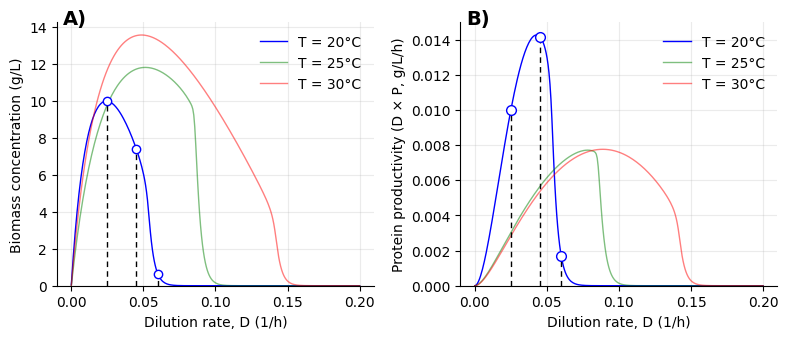

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# =============================================================================
# Selection plot: Biomass (A) and Protein productivity (B) vs D
# =============================================================================

D_lines = [0.025, 0.045, 0.06]

fig, axs = plt.subplots(1, 2, figsize=(8, 3.5), sharex=True)

# Transparency settings
alpha_map = {20: 1.0, 25: 0.5, 30: 0.5}

# Reference curves for 20 °C
D_20  = np.asarray(results[20]["D"])
X_20  = np.asarray(results[20]["x"])
DP_20 = np.asarray(results[20]["DP"])

# ------------------------------------------------------------------
# PANEL A — Biomass concentration
# ------------------------------------------------------------------
ax = axs[0]
for T in temperatures:
    ax.plot(
        results[T]["D"],
        results[T]["x"],
        label=labels[T],
        color=colors[T],
        alpha=alpha_map[T],
        linewidth=1.0
    )

# Vertical lines on biomass (ending at 20 °C curve)
for Dv in D_lines:
    X_at_Dv = np.interp(Dv, D_20, X_20)

    ax.vlines(
        x=Dv,
        ymin=0.0,
        ymax=X_at_Dv,
        colors="black",
        linestyles=(0, (4, 3)),
        linewidth=1.0
    )

    ax.plot(
        Dv, X_at_Dv,
        marker="o",
        markersize=6,
        markeredgewidth=1.0,
        markerfacecolor="white",
        markeredgecolor=colors[20],
        zorder=3
    )

ax.set_xlabel("Dilution rate, D (1/h)")
ax.set_ylabel("Biomass concentration (g/L)")
ax.set_ylim(bottom=0)
ax.grid(alpha=0.25)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(frameon=False)

# Panel label A)
ax.text(
    0.02, 1.05, "A)",
    transform=ax.transAxes,
    fontsize=14,
    fontweight="bold",
    va="top",
    ha="left"
)

# ------------------------------------------------------------------
# PANEL B — Protein productivity
# ------------------------------------------------------------------
ax = axs[1]
for T in temperatures:
    ax.plot(
        results[T]["D"],
        results[T]["DP"],
        label=labels[T],
        color=colors[T],
        alpha=alpha_map[T],
        linewidth=1.0
    )

# Vertical lines on protein productivity (ending at 20 °C curve)
for Dv in D_lines:
    DP_at_Dv = np.interp(Dv, D_20, DP_20)

    ax.vlines(
        x=Dv,
        ymin=0.0,
        ymax=DP_at_Dv,
        colors="black",
        linestyles=(0, (4, 3)),
        linewidth=1.0
    )

    ax.plot(
        Dv, DP_at_Dv,
        marker="o",
        markersize=7,
        markeredgewidth=1.0,
        markerfacecolor="white",
        markeredgecolor=colors[20],
        zorder=3
    )

ax.set_xlabel("Dilution rate, D (1/h)")
ax.set_ylabel("Protein productivity (D × P, g/L/h)")
ax.set_ylim(bottom=0)
ax.grid(alpha=0.25)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(frameon=False)

# Panel label B)
ax.text(
    0.02, 1.05, "B)",
    transform=ax.transAxes,
    fontsize=14,
    fontweight="bold",
    va="top",
    ha="left"
)

plt.tight_layout()

# -------- SAVE FIGURE (PNG, lightweight) --------
fig.savefig(
    "selection_dilution_rates.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

# -------- DOWNLOAD FROM COLAB --------
from google.colab import files
files.download("selection_dilution_rates.png")
